In [119]:
import numpy as np
from OpenEphys import loadContinuous
import os
import glob
from scipy import signal as ss
from scipy import stats as st
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Select file for analysis
files_to_be_converted = ['Pre 1','Pre 2','Pre 3','Cit 1','Cit 2','Cit 3','Way 1', 'Way 2','Way 3']
source_folder = r'/Users/sharplab/tran/EEG data'

path = "/".join([source_folder,files_to_be_converted[0]])
os.chdir(path)
file = glob.glob("*.continuous")
print(file[0])
eegdata = loadContinuous(file[0], dtype=float)
array = eegdata['data']

#Functions for filters
def butter_lowpass(low_cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_low_cutoff = low_cutoff / nyq
    b_low, a_low = butter(order, normal_low_cutoff, btype='lowpass', analog=False)
    return b_low, a_low

def butter_lowpass_filter(data, low_cutoff, fs, order=5):
    b_low, a_low = butter_lowpass(low_cutoff, fs, order=order)
    y_low = lfilter(b_low, a_low, data)
    return y_low

# Filter requirements.
order = 5
fs = 30000.0       # sample rate, Hz
low_cutoff = 100 # desired cutoff frequency of the filter, Hz
high_cutoff = 0.1


# Filter the data.
print('Filtering data')
filtered_array = butter_lowpass_filter(array, low_cutoff, fs, order)

#Choose the shape for the newarray after downsampling
duration = np.shape(array)[0]/30000
newarrayshape = np.real(int(round(256*duration)))

#downsampling the data array
print('Downsampling data')
newarray=ss.resample(filtered_array, newarrayshape)
neatarray = newarray[:932864]

100_CH43.continuous
Loading continuous data...
Filtering data
Downsampling data


In [132]:
print(np.shape(array)[0]/(np.shape(array)[0]/30000*256))
print(30000/250)

117.1875
120.0


In [123]:
len(neatarray)/1024


911.0

In [124]:
sampling_rate = 256
bin_size = sampling_rate * 4

binned_frequencies, binned_time, binned_Sxx = ss.spectrogram(neatarray,
                                                             sampling_rate, ss.get_window('flattop', 1024), noverlap=512, nperseg=bin_size)
df = pd.DataFrame(data=binned_Sxx,
                     columns=binned_time,
                     index=binned_frequencies).transpose()

df.head()

,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,...,125.75,126.0,126.25,126.5,126.75,127.0,127.25,127.5,127.75,128.0
2.0,19781.757272,33978.070109,30203.110372,23318.345594,8825.268592,2157.056832,1231.799853,1992.440321,2468.116066,1092.545363,...,0.019115,0.010323,0.002907,0.003479,0.006105,0.005881,0.007353,0.019525,0.018205,0.007070
4.0,11744.393694,19139.558403,11743.517011,7369.005169,5396.042452,5561.144073,3093.624399,1402.398939,1851.020356,1257.529710,...,0.023409,0.017488,0.004952,0.002438,0.015087,0.021293,0.006938,0.008326,0.006848,0.005297
6.0,645.927405,723.023240,1381.782278,1264.465384,176.971470,1062.060213,4203.685067,8609.396386,10343.248878,7765.465349,...,0.003939,0.009373,0.007943,0.012366,0.016968,0.030048,0.032460,0.025309,0.006399,0.000041
8.0,0.156411,1556.362123,5015.401970,7775.701569,8726.378398,4700.074089,850.680899,1574.112838,3217.982815,3744.081143,...,0.032644,0.027175,0.025353,0.015204,0.004160,0.026367,0.022145,0.019685,0.009296,0.000264
10.0,26913.708984,58336.929414,54692.613705,50846.767527,36996.585441,17787.785619,10146.250962,8785.775154,11338.340821,10403.877846,...,0.040911,0.035121,0.043095,0.073729,0.098973,0.096747,0.081129,0.078015,0.057037,0.018113


In [121]:
df = df.reset_index()
df = df.rename(columns={'index': 'time'})
df['time'] = pd.to_timedelta(df['time'], unit='s')
df.set_index('time', inplace=True)
df.head()

,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,...,125.75,126.0,126.25,126.5,126.75,127.0,127.25,127.5,127.75,128.0
time,,,,,,,,,,,,,,,,,,,,,
00:00:02,19781.757272,33978.070109,30203.110372,23318.345594,8825.268592,2157.056832,1231.799853,1992.440321,2468.116066,1092.545363,...,0.019115,0.010323,0.002907,0.003479,0.006105,0.005881,0.007353,0.019525,0.018205,0.007070
00:00:04,11744.393694,19139.558403,11743.517011,7369.005169,5396.042452,5561.144073,3093.624399,1402.398939,1851.020356,1257.529710,...,0.023409,0.017488,0.004952,0.002438,0.015087,0.021293,0.006938,0.008326,0.006848,0.005297
00:00:06,645.927405,723.023240,1381.782278,1264.465384,176.971470,1062.060213,4203.685067,8609.396386,10343.248878,7765.465349,...,0.003939,0.009373,0.007943,0.012366,0.016968,0.030048,0.032460,0.025309,0.006399,0.000041
00:00:08,0.156411,1556.362123,5015.401970,7775.701569,8726.378398,4700.074089,850.680899,1574.112838,3217.982815,3744.081143,...,0.032644,0.027175,0.025353,0.015204,0.004160,0.026367,0.022145,0.019685,0.009296,0.000264
00:00:10,26913.708984,58336.929414,54692.613705,50846.767527,36996.585441,17787.785619,10146.250962,8785.775154,11338.340821,10403.877846,...,0.040911,0.035121,0.043095,0.073729,0.098973,0.096747,0.081129,0.078015,0.057037,0.018113


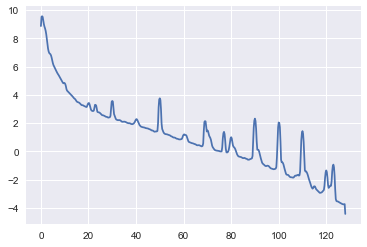

In [122]:
df_lowf = df.iloc[:, :]
mean_freqs = df_lowf.apply(np.mean, axis=0)
plt.plot(mean_freqs.index, np.log(mean_freqs))
plt.show()

In [236]:
print(np.shape(df.index.values))
print(np.shape(df.values))
print(np.shape(binned_time))
print(np.shape(binned_frequencies))
print(np.shape(binned_Sxx))
df.values

(41,)
(41, 12801)
(41,)
(12801,)
(12801, 41)


array([[2.82187622e+02, 8.90833964e+01, 2.05044708e+02, ...,
        4.40884986e-02, 3.43720587e-03, 1.83232271e-04],
       [1.21705935e+02, 3.53404652e+02, 3.33445841e+02, ...,
        1.29337678e-02, 3.84448689e-03, 1.75637325e-02],
       [1.51908790e+02, 4.57665400e-02, 4.31597962e+02, ...,
        5.48309826e-02, 3.53980986e-02, 4.08706890e-03],
       ...,
       [1.27502023e+02, 1.26918792e+00, 3.39602090e+01, ...,
        8.20970230e-03, 5.59455431e-03, 3.04712183e-03],
       [6.77214209e+01, 8.90680021e+00, 2.99536258e+01, ...,
        1.45802821e-02, 2.36787924e-02, 3.39645865e-02],
       [1.54567256e+01, 1.37369180e+03, 5.30536655e+03, ...,
        1.17854572e-01, 8.34286801e-02, 3.73187737e-03]])

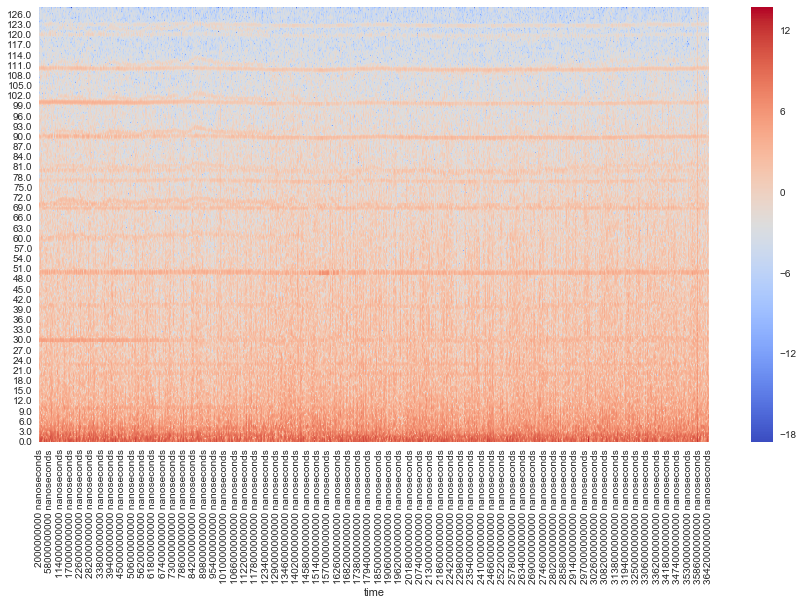

In [67]:
sns.set()
f, a = plt.subplots(figsize=(15,8))

a = sns.heatmap(np.log(df_lowf.transpose()), cmap='coolwarm')

a.invert_yaxis()
plt.show()

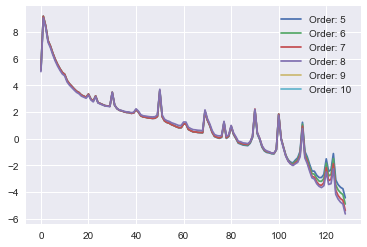

In [36]:
#investigating the effect of 'order' parameter on filtering
import seaborn as sns
sns.set()
output_dir = "/Users/sharplab/tran/order pics"


fs = 30000.0       # sample rate, Hz
low_cutoff = 100 # desired cutoff frequency of the filter, Hz
high_cutoff = 0.1
sampling_rate =256
for new_order in np.arange(5,11):
    filtered_array = butter_lowpass_filter(array, low_cutoff, fs, new_order)
    duration = np.shape(array)[0]/30000
    newarrayshape = np.real(int(round(256*duration)))
    newarray=ss.resample(filtered_array, newarrayshape)
    bin_container = np.array_split(newarray, np.round(len(newarray)/1024)+1)
    df_list = []
    for ind, bin_ in enumerate(bin_container):
        binned_frequencies, binned_time, binned_Sxx = ss.spectrogram(bin_,
                                                             sampling_rate)
        df = pd.DataFrame(data=binned_Sxx,
                     columns=binned_time,
                     index=binned_frequencies).transpose()
        df = df.apply(np.mean, axis=0)

        time = binned_time[0] + (ind * 4)
        df = pd.DataFrame({'frequency': df.index.values,
                       'frequency values': df.values,
                       'time': time})
        df['time'] = pd.to_timedelta(df['time'], unit='s')
        df = df.set_index('time')
        df = df.reset_index().pivot(index='time', columns='frequency', values='frequency values')
        df_list.append(df)

    df = pd.concat(df_list)
    df_lowf = df.iloc[:, :]
    mean_freqs = df_lowf.apply(np.mean, axis=0)
    plt.plot(mean_freqs.index, np.log(mean_freqs), label='Order: {}'.format(new_order))
plt.legend()
plt.savefig('{}/graph.png'.format(output_dir))
    

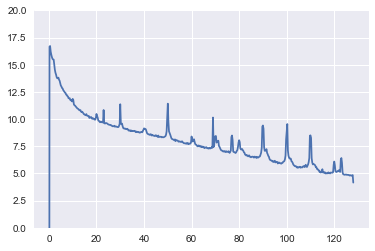

In [137]:
sum_series = pd.Series()
for ind, bin_ in enumerate(bin_container):
    periodogram_frequency, Pxx = ss.periodogram(bin_,sampling_rate, nfft=1024)
    ser = pd.Series(data=Pxx,index=periodogram_frequency)
    sum_series = sum_series.add(ser, fill_value=0)

plt.ylim((0,20))
plt.plot(np.log(sum_series))

In [66]:
import numpy as np
from OpenEphys import loadContinuous
import os
import glob
from scipy import signal as ss
from scipy import stats as st
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Select file for analysis
files_to_be_converted = ['Pre 1','Pre 2','Pre 3','Cit 1','Cit 2','Cit 3','Way 1', 'Way 2','Way 3']
source_folder = r'/Users/sharplab/tran/EEG data'

path = "/".join([source_folder,files_to_be_converted[0]])
os.chdir(path)
file = glob.glob("*.continuous")
print(file[0])
eegdata = loadContinuous(file[0], dtype=float)
array = eegdata['data']




100_CH43.continuous
Loading continuous data...


In [72]:
duration = np.shape(array)[0]/30000
newarrayshape = np.real(int(round(250*duration)))
newarray=ss.resample(array, newarrayshape)

In [81]:
duration*250

911189.3333333334

In [73]:
#Functions for filters
def butter_lowpass(low_cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_low_cutoff = low_cutoff / nyq
    b_low, a_low = butter(order, normal_low_cutoff, btype='lowpass', analog=False)
    return b_low, a_low

def butter_lowpass_filter(data, low_cutoff, fs, order=5):
    b_low, a_low = butter_lowpass(low_cutoff, fs, order=order)
    y_low = lfilter(b_low, a_low, data)
    return y_low

# Filter requirements.
order = 5
fs = 30000.0       # sample rate, Hz
low_cutoff = 100 # desired cutoff frequency of the filter, Hz
high_cutoff = 0.1


# Filter the data.
print('Filtering data')
filtered_array = butter_lowpass_filter(newarray, low_cutoff, fs, order)

Filtering data


In [74]:
sampling_rate = 250
bin_size = sampling_rate * 4

binned_frequencies, binned_time, binned_Sxx = ss.spectrogram(filtered_array,
                                                             sampling_rate, ss.get_window('hamming', bin_size), noverlap=bin_size/2, nperseg=bin_size)
df = pd.DataFrame(data=binned_Sxx,
                     columns=binned_time,
                     index=binned_frequencies).transpose()

df.head()

,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,...,122.75,123.0,123.25,123.5,123.75,124.0,124.25,124.5,124.75,125.0
2.0,1602.351288,36501.135423,27315.301966,3819.619671,639.398623,113.437078,44.066328,3.135277,0.766034,0.467682,...,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000033
4.0,1832.870647,21631.387368,17877.710013,13606.901572,6806.304424,414.104294,22.851266,12.875571,0.269663,0.239717,...,0.000272,0.000272,0.000272,0.000272,0.000272,0.000271,0.000271,0.000271,0.000271,0.000136
6.0,595.471960,1082.799234,3986.137133,561.380638,514.513545,23.394848,26.056273,3.829118,2.865319,0.442730,...,0.000771,0.000771,0.000771,0.000771,0.000771,0.000771,0.000771,0.000771,0.000771,0.000385
8.0,138.772790,336.295274,2851.819419,5023.618366,2275.352349,87.361155,9.194792,4.499880,2.637286,0.142469,...,0.000312,0.000312,0.000312,0.000312,0.000312,0.000312,0.000312,0.000312,0.000312,0.000156
10.0,6160.842736,3228.889649,26312.604218,37015.235356,1452.031508,100.255476,14.250109,1.017544,19.851882,4.625921,...,0.005366,0.005365,0.005364,0.005363,0.005363,0.005362,0.005362,0.005362,0.005362,0.002681


In [75]:
df = df.reset_index()
df = df.rename(columns={'index': 'time'})
df['time'] = pd.to_timedelta(df['time'], unit='s')
df.set_index('time', inplace=True)
df.head()

,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,...,122.75,123.0,123.25,123.5,123.75,124.0,124.25,124.5,124.75,125.0
time,,,,,,,,,,,,,,,,,,,,,
00:00:02,1602.351288,36501.135423,27315.301966,3819.619671,639.398623,113.437078,44.066328,3.135277,0.766034,0.467682,...,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000033
00:00:04,1832.870647,21631.387368,17877.710013,13606.901572,6806.304424,414.104294,22.851266,12.875571,0.269663,0.239717,...,0.000272,0.000272,0.000272,0.000272,0.000272,0.000271,0.000271,0.000271,0.000271,0.000136
00:00:06,595.471960,1082.799234,3986.137133,561.380638,514.513545,23.394848,26.056273,3.829118,2.865319,0.442730,...,0.000771,0.000771,0.000771,0.000771,0.000771,0.000771,0.000771,0.000771,0.000771,0.000385
00:00:08,138.772790,336.295274,2851.819419,5023.618366,2275.352349,87.361155,9.194792,4.499880,2.637286,0.142469,...,0.000312,0.000312,0.000312,0.000312,0.000312,0.000312,0.000312,0.000312,0.000312,0.000156
00:00:10,6160.842736,3228.889649,26312.604218,37015.235356,1452.031508,100.255476,14.250109,1.017544,19.851882,4.625921,...,0.005366,0.005365,0.005364,0.005363,0.005363,0.005362,0.005362,0.005362,0.005362,0.002681


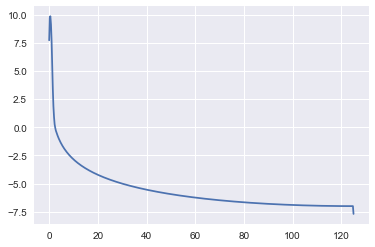

In [76]:
df_lowf = df.iloc[:, :]
mean_freqs = df_lowf.apply(np.mean, axis=0)
plt.plot(mean_freqs.index, np.log(mean_freqs))
plt.show()

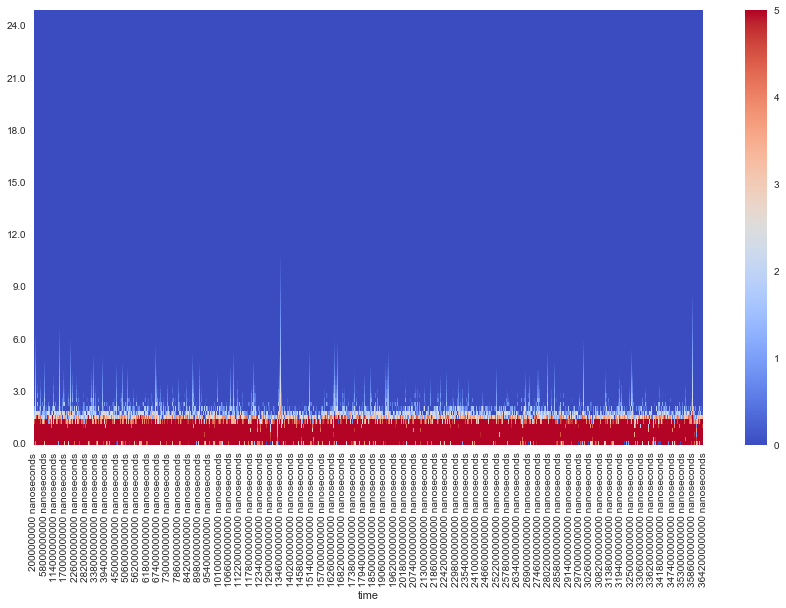

In [79]:
sns.set()
f, a = plt.subplots(figsize=(15,8))

a = sns.heatmap(np.log(df_lowf.transpose()), cmap='coolwarm', vmin=0, vmax=5)

a.invert_yaxis()
plt.ylim((0,100))
plt.show()